1. Linear Regression using two dimensional data 
2. I create two lists  xs and ys.


In [2]:
xs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ys = [10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]

In [6]:
len(xs), len(ys)

(24, 24)

In [21]:
import numpy as np
import matplotlib.pyplot as plt


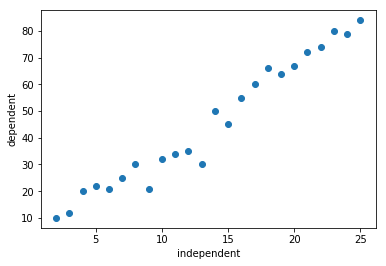

In [46]:
plt.scatter(xs,ys)
plt.ylabel('dependent')
plt.xlabel('independent')
plt.show()

 A linear regression line has the equation Y = mx+c, where m is the coefficient of independent variable and c is the intercept.


In [23]:
# 1. The mathematical formula to calculate slope (m) is:
# 2. (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))

In [24]:
 #The formula to calculate intercept (c) is:
# mean(y) – mean(x) * m

In [25]:
# Now, let’s write a function for intercept and slope (coefficient):


In [27]:
def slope_intercept(x_val, y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = ((np.mean(x) * np.mean(y)) - np.mean(x*y)) / ((np.mean(x)*np.mean(x)) - np.mean(x * x))
    m = round(m, 2)
    c = np.mean(y) - (np.mean(x)*m)
    c = round(m, 2)
    return(m, c)

slope_intercept(xs, ys)
         

(3.29, 3.29)

In [36]:
#m,c = slope_intercept(xs, ys)

In [43]:
#reg_line is the equation of the regression line:

reg_line = [((m*x) + c) for x in xs]

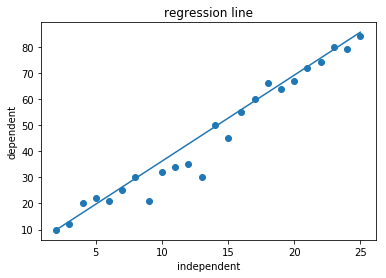

In [48]:
plt.scatter(xs, ys)
plt.plot(xs, reg_line)
plt.ylabel('dependent')
plt.xlabel('independent')
plt.title('regression line')
plt.show()

 1. Root Mean Squared Error(RMSE)
 2. RMSE is the standard deviation of the residuals (prediction errors). 
 3. Residuals are a measure of how far from the regression line data points are, and 
 4. RMSE is a measure of how spread out these residuals are.


1. If Yi is the actual data point and 
2. (Y hat of i) is the predicted value by the equation of line then 
3. RMSE is the square root of (Yi – Y hat of i)**2


# Let’s define a function for RMSE:


In [63]:
from math import sqrt
def rmse(y1, y_hat):
    y_actual  = np.array(y1)
    y_pred    = np.array(y_hat)
    error     = (y_actual - y_pred)**2
    error_mean= round(np.mean(error))
    error_sqr = sqrt(error_mean)
    return error_sqr
rmse(ys, reg_line)

5.0990195135927845

# make a function for estimated coefficient

#### In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant

Estimated coefficients:
b_0 = -0.05862068965517242nb_1 = 1.457471264367816


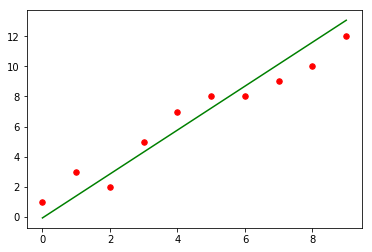

In [64]:
def estimate_coef(x, y):
    # number of observations 
    
    n = np.size(x)
    
    # mean of x and y vector    
    m_x, m_y = np.mean(x), np.mean(y)
    
    # calculating cross deviation and deviation    
    SS_xy = np.sum(x*y - n*m_y*m_x)
    SS_xx = np.sum(x*x - n*m_x*m_x)
    
    # calculating regression coefficient   
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return(b_0, b_1)
    
    
def plot_regression(x, y, b):
    plt.scatter(x, y, color = 'r', marker = 'o', s = 30)
    
    # predicted response vector
    y_pred = b[0] + b[1]*x
    
    # plotting regression line
    plt.plot(x, y_pred, color = 'g')
    plt.xlabel = ('x axis')
    plt.ylabel = ('y axis')
    plt.show()
    
def main():
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}nb_1 = {}".format(b[0], b[1])) 
      # plotting regression line 
    plot_regression(x, y, b) 
    
  
if __name__ == "__main__": 
    main() 

    

In [2]:
# Given below is the implementation of multiple linear regression technique
# on the Boston house pricing dataset dataset using Scikit-learn.


# not understand properly

In [3]:

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
  

In [14]:
# load boston dataset
boston =  datasets.load_boston(return_X_y = False)

# defining feature matrix(X) and response vector(y) 

X  = boston.data
y = boston.target

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1) 

#create a linear regression object
reg = linear_model.LinearRegression()

#train model using train sets
reg.fit(X_train, y_train)

# regression coefficient
print('regression coefficient \n ', reg.coef_)

# variance score :1 means perfect prediction
print('variance score {} is '.format(reg.score(X_test, y_test)))

regression coefficient 
  [-8.80740828e-02  6.72507352e-02  5.10280463e-02  2.18879172e+00
 -1.72283734e+01  3.62985243e+00  2.13933641e-03 -1.36531300e+00
  2.88788067e-01 -1.22618657e-02 -8.36014969e-01  9.53058061e-03
 -5.05036163e-01]
variance score 0.7208987846108872 is 


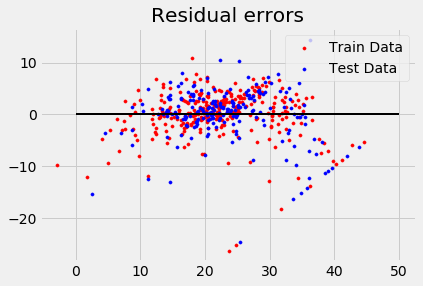

In [20]:
# plot for residual error
# setting plot

plt.style.use('fivethirtyeight')

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,color = 'r', s = 10, label = "Train Data")
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = 'b', s = 10, label = "Test Data")

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

  
            
            